In [1]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
df = pd.read_csv('lecture2/adult.csv', na_values = '?')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Проведите первичный анализ

In [4]:
print("\n Общая информация\n")
df.info()

print("\n Числовые колонки \n")
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

print("\n Нечисловые колонки\n")
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


 Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

 Числовые колонки 

['age' 'fnlwgt' 'educational-num' '

### Проверьте данные на пропуски

In [5]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.2%}')

age - 0.00%
workclass - 5.73%
fnlwgt - 0.00%
education - 0.00%
educational-num - 0.00%
marital-status - 0.00%
occupation - 5.75%
relationship - 0.00%
race - 0.00%
gender - 0.00%
capital-gain - 0.00%
capital-loss - 0.00%
hours-per-week - 0.00%
native-country - 1.75%
income - 0.00%


### Построить график

<AxesSubplot:>

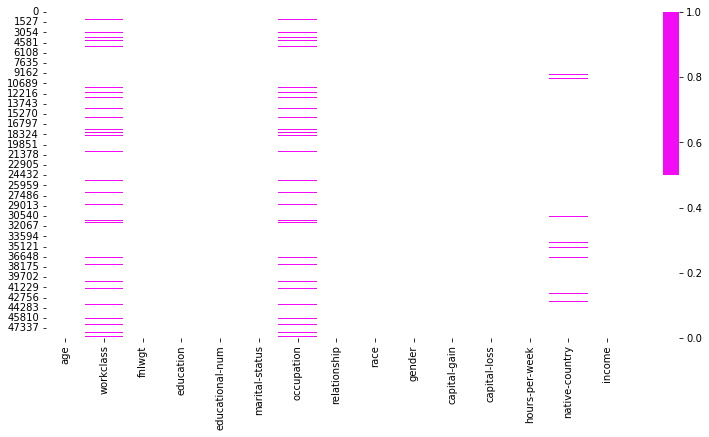

In [6]:
cols = df.columns
colours = ['#ffffff', '#f20cf5'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### Удалите пропуски в случае обнаружения


В данном случае: 
 - отсутствуют только качественные параметры  -> стандартые методы (например, поиск среднего по группе) не сработают
 - маленький процент от общего числа -> нецелесообразно искать более сложные подходы

In [7]:
df = df.dropna()

### Преобразуйте категориальные признаки

In [8]:
ll = pd.get_dummies(df, columns = ["workclass", "education", "marital-status", "occupation", 
                              "relationship", "race", "gender", "native-country"],
                             prefix=["workclass", "education", "marital", "occupation", 
                              "relationship", "race", "gender", "country"])

In [9]:
ll.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

### Логистическая регрессия

In [10]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
le.fit(ll["income"])

LabelEncoder()

In [13]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

y = pd.Series (le.transform(ll["income"]))
x = ll.drop('income',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [21]:
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
predictions = model.predict(x_test)

In [35]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [34]:
y_test[:5]

31625    0
19825    1
24452    0
1633     0
25939    0
dtype: int64

In [36]:
model.predict_proba(x_test)

array([[0.71327031, 0.28672969],
       [0.80160131, 0.19839869],
       [0.82389981, 0.17610019],
       ...,
       [0.59140353, 0.40859647],
       [0.73081019, 0.26918981],
       [0.45224943, 0.54775057]])

In [37]:
model.score(x_train,y_train)

0.7909721646349891

In [38]:
model.score(x_test,y_test)

0.793698175787728

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [46]:
model_p = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [47]:
model_p.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [48]:
predictions_p = model_p.predict(x_test)

In [49]:
predictions_p[:5]

array([0, 0, 0, 1, 0])

In [51]:
model_p.score(x_train,y_train) # проверяем ошибку обучения

0.8485501838184482

In [50]:
model_p.score(x_test,y_test) # проверяем ошибку обобщения

0.8511885019347706

### Метод опорных векторов

In [39]:
from sklearn.svm import SVC

In [53]:
clf = make_pipeline(StandardScaler(), SVC (gamma = 'auto'))

In [54]:
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [55]:
clf.score(x_train,y_train) # проверяем ошибку обучения

0.8586947508085248

In [56]:
clf.score(x_test,y_test) # проверяем ошибку обобщения

0.845992260917634

#### Поскольку SVM чувствительна к выбросам - посчитала сразу со скейлером. Результат на обучающих данный получился одинаковый до тысячных, но ошибка обощения выше в лин. регрессии.